In [10]:
from scipy.io import loadmat
import numpy as np
from cartopy import config
import matplotlib.pyplot as plt
import cartopy.crs as ccrs

# 1
Autotrophic organisms can produce their on food using light (via
photosynthesis).  In contrast, heterotrophic organisms rely on other
organisms for food.

Phytoplankton - autotrophic

Zooplankton - heterotrophic

Fish - heterotrophic

Bacteria - most are heterotrophic but some are autotrophs

Diatoms - most are autotrophic, but some can be heterotrophic

Dinoflagellates - both, can photosynthesize and ingest organic particles

Coccolithophores - both, can photosynthesize and absorb organic matter

# 2

The f-ratio is the fraction of NPP that is sources from new nutrients

$f = \frac{new}{NPP}$

The e-ratio is the fraction of NPP that leaves the euphotic zone.

$e = \frac{export}{NPP}$

The assumption that the e-ration is the same as the f-ration over large spatial and temporal scales implies that the new production and the export production are the same over these scales.


# 3
ballast minerals are dense minerals that form shells around some phytoplankton (ex: calcium carbonate)

$z* = \frac{w_{sink}}{k_{remin}}$

1) Ballast minerals make the organic matter larger (larger radius), which will make it sink faster (increase in $w_{sink}$)

2) Ballast minerals will protect phytoplankton from being eaten as quickly which will increase the remineralization length scale

# 4
Based on the equation and code below, $\textbf{B}$ will sink faster.

$w_{sink} = \frac{2gr^2(\rho_p - \rho_w)}{9\mu}$ where r is the particle radius, $\rho_p$ and $\rho_w$ are the densities of the particle and sea water, respectively, and $\mu$ is the seawater viscosity.

In [2]:
###### 4 ######
OM_a = 0.9 #fraction organic matter
OM_b = 0.75
CaCO3_a = 0.02 #fraction calcium carbonate
CaCO3_b = 0.2
opal_a = 0.08 #fraction opal
opal_b = 0.05
r_a = 50*10**(-6) #radius (m)
r_b = 40*10**(-6)

rho_om = 1060 #density organic matter (kg/m^3)
rho_ca = 2710 #density CaCO3 (kg/m^3)
rho_opal = 2100 #density opal (kg/m^3)
g = 9.8 #gravitational acceleration (m/s^2)
rho_w = 1027 #average density sea water (kg/m^3)
mu = 1.88*10**(-3) #sea water viscosity (Pa s)

rho_a = rho_om*OM_a + rho_ca*CaCO3_a + rho_opal*opal_a #density of A
rho_b = rho_om*OM_b + rho_ca*CaCO3_b + rho_opal*opal_b #density of B
w_a = (2*g*r_a**2*(rho_a - rho_w))/(9*mu) #sinking velocity for A
w_b = (2*g*r_b**2*(rho_b - rho_w))/(9*mu) #sinking velocity for A

print(f'Sinking velocity of A = {w_a:0.3e} m/s')
print(f'Sinking velocity of B = {w_b:0.3e} m/s')



Sinking velocity of A = 4.321e-04 m/s
Sinking velocity of B = 7.692e-04 m/s


# 5

At a salinity of 35 and a potential temperature of $0^\circ C$, the saturation concentration of $O_2$ ($[O_2]_{equil}$) is 359.1 $mmol/m^3$ (from Table 3.2.4).  The equation below is used to calculate the Apparent Oxygen Utilization (AOU):

$AOU = [O_2]_{equil} - [O_2]_{obs}$

In [64]:
equil = 359.1 #(mmol/m^3) saturation concentration of O2 for salinity of 35 and potential temp of 0C
obs = 120 #(mmol/m^3) observed O2 concentration
AOU = equil - obs

print(f'The Apparent Oxygen Utilization is: {AOU:0.2f} mmol/m^3')

The Apparent Oxygen Utilization is: 239.10 mmol/m^3


# 6
### a
The C:N:P ratio is 106:16:1
### b
The chemical equation for this reaction is: $(CH_2)_{30}(CH_2O)_{76}(NH_3)_{16}(H_3PO_4) + ?O_2 -> 106CO_2 + 16HNO3 + H_3PO_4 + ?H_2O$

To balance the hydrogen moles on the left side of the reaction there needs to be 122 moles of $H_2O$ on the right.

To balance the oxygen on the right side, there needs to be 153 moles of $O_2$ on the left.

Thus, $\textbf{153}$ moles of $O_2$ are required

### c


# 7

The concentration of Calcium hardly varies in sea water and has a long residence time.  This means that any change in the Cd/Ca ratio is the result of a change in the ocean distribution of Cadmium.  The distribution of Cadmium is similar to that of nutrient elements (Nitrogen, Phosphorous, etc).  This means that the concentration of Cadmium is lowest in surface waters and its concentration is highest in the deep North Pacific.  An abrupt reduction in nutrient upwelling in the North Pacific would result in lower Cadmium concentrations at the surface meaning that less Cadmium is available to create shells for phytoplankton compared to Calcium.  This will result in a decrease in the Cd/Ca ratio taken from sediment core as less Cadmium shells are found in the sediment.  This result is consistent with what is seen in Figure 1.

In [4]:
par = loadmat('par.mat')['par']
sst = loadmat('sst.mat')['sst']
chl = loadmat('chl.mat')['chl']
(x,y) = sst.shape

lat=np.linspace(-90,89,x)
lon=np.linspace(-180,179,y)



In [21]:
def npp_calc(sst, chl, par,lat):
    # calculate par function
    fpar = 0.66125*par/(par + 4.1)
    
    #Pb_opt
    if (sst < -10.0): 
        pb_opt = 0; 
    elif (sst <  -1.0): 
        pb_opt = 1.13; 
    elif (sst >  28.5): 
        pb_opt = 4.00;
    else:
        pb_opt = 1.2956 + 2.749e-1*sst + 6.17e-2*sst**2 - 2.05e-2*sst**3+ 2.462e-3*sst**4 - 1.348e-4*sst**5 + 3.4132e-6*sst**6 - 3.27e-8*sst**7
    
    #Euphotic zone depth
    if (chl <  1.0):
        chl_tot = 38.0 * chl**0.425;
    else:
        chl_tot = 40.2 * chl**0.507;


    z_eu = 200.0 * chl_tot**-.293;

    if (z_eu <= 102.0): 
        z_eu = 568.2 * chl_tot**-.746;
        
    # calculate day length based on latitude and day of year (October 1)
    D = 274 #day of year for October 1
    P = np.arcsin(0.39795*np.cos(.2163108+2*np.arctan(0.9671396*np.tan(0.00860*(D - 186)))))
    day_length = 24 - (24/np.pi)*np.arccos((np.sin(0.8333*np.pi/180)+np.sin(lat*np.pi/180)*np.sin(P))/(np.cos(lat*np.pi/180)*np.cos(P)))
    
    npp = pb_opt * chl  * fpar * z_eu * day_length
    return npp
    

In [55]:
npp = np.zeros((x,y))

for i in range(x):
    for j in range(y):
        npp[i,j] = npp_calc(sst[i,j], chl[i,j],par[i,j], lat[i])

/Applications/anaconda3/envs/BGCHW/lib/python3.7/site-packages/ipykernel_launcher.py:30: RuntimeWarning: invalid value encountered in arccos


In [59]:
e  = -0.0081 * sst + 0.0806*np.log(chl) + 0.426
export = e*npp

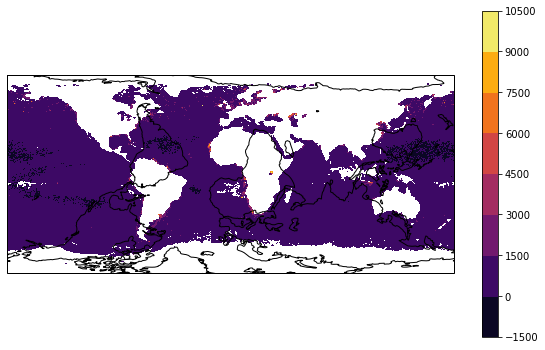

In [61]:
plt.figure(figsize=(10,6))

ax = plt.axes(projection=ccrs.PlateCarree())

plt.contourf(lon, lat, export, transform=ccrs.PlateCarree())
ax.coastlines()
plt.xlabel('longitude')
plt.ylabel('latitude')
plt.gca().invert_yaxis()
plt.colorbar()
plt.set_cmap('inferno')
plt.show()